# ANALISI POSIZIONE DEGLI APPARTAMENTI

In [1]:
#insieme delle librerie importate e moduli utilizzati
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, arccos, pi, round

In [2]:
#import dataframe
df_listings = pd.read_csv(r'C:/Users/ivano/Documents/listings.csv')   #annunci appartamenti AirBnb Milano from http://insideairbnb.com/get-the-data/
df_metro = pd.read_json(r'C:/Users/ivano/documenti/metromilano.json') #coordinate fermate metro Milano from http://www.datiopen.it/it/opendata/Comune_di_Milano_Fermate_della_metropolitana

In [3]:
#blocco tutto da eliminare perché sarà tutto presente già nella prima parte
#da lì prenderò direttamente i due dataframe success_df e not_success_df

def elimina_colonne(df, colonne_da_elim):
    """
    Crea una lista delle colonne da eliminare e le elimina dal dataframe.

    Args:
        df (pandas.DataFrame): il dataframe di partenza.
        colonne_da_elim (list): la lista delle colonne da eliminare.

    Returns:
        pandas.DataFrame: il dataframe con le colonne eliminate.
    """
    # Crea una copia del dataframe originale
    df_smart = df.copy()

    # Elimina le colonne specificate
    df_smart = df_smart.drop(columns=colonne_da_elim)

    return df_smart

list_elim = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url','host_name',
             'host_location','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_listings_count',
             'host_total_listings_count','neighbourhood','neighbourhood_group_cleansed','bathrooms',
             'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
             'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated','has_availability', 
             'calendar_last_scraped', 'number_of_reviews_ltm','number_of_reviews_l30d','license' ]

df_smart = elimina_colonne(df_listings, list_elim)

def split_df(df, success_criteria):
    """
    Filtra il dataframe sulla base dei criteri di successo specificati e crea due nuovi dataframe, uno contenente gli
    annunci di successo e l'altro il complementare.

    Args:
        df (pandas.DataFrame): il dataframe originale.
        success_criteria (dict): un dizionario contenente come chiave il nome della colonna e come valore una tupla che
        contiene il nome dell'operatore di confronto e il valore con cui confrontare.

    Returns:
        pandas.DataFrame: il dataframe contenente gli annunci di successo.
        pandas.DataFrame: il dataframe contenente gli annunci non di successo.
    """
    # Crea la colonna "success"
    success = []
    for idx, row in df.iterrows():
        check = True
        for col, (op, val) in success_criteria.items():
            if op == ">":
                if not row[col] > val:
                    check = False
                    break
            elif op == ">=":
                if not row[col] >= val:
                    check = False
                    break
            elif op == "<":
                if not row[col] < val:
                    check = False
                    break
            elif op == "<=":
                if not row[col] <= val:
                    check = False
                    break
            elif op == "==":
                if not row[col] == val:
                    check = False
                    break
            elif op == "!=":
                if not row[col] != val:
                    check = False
                    break
        success.append(check)

    df["success"] = success

    # Divide il dataframe in due
    success_df = df[df["success"]]
    not_success_df = df[~df["success"]]

    return success_df, not_success_df

success_criteria = {"number_of_reviews": (">", 50), "availability_30":("<=", 5)}

success_df, not_success_df = split_df(df_smart, success_criteria)

In [5]:
# preparazione dataframe con coordinate per gli appartamenti di successo

geo_success = success_df[['id', 'latitude', 'longitude']] # necessarie solo colonne ID, latitudine e longitudine
geo_success.reset_index(inplace=True)                     # si reimposta l'indice dataframe ordinato partendo da 0
geo_success.drop(['index'], axis=1, inplace=True)         # per permettere successivamente i cicli for

C:\Users\ivano\AppData\Local\Temp\ipykernel_10092\3138970317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_success.drop(['index'], axis=1, inplace=True)


In [37]:
geo_success

,id,latitude,longitude
0,5625937,45.46001,9.18582
1,206450,45.45238,9.20745
2,2759420,45.48264,9.18543
3,24224061,45.46722,9.17246
4,34704076,45.46243,9.12601
...,...,...,...
1502,32807147,45.47894,9.17549
1503,3816798,45.47167,9.23089
1504,17899097,45.46499,9.22995
1505,3725671,45.47641,9.18230


In [7]:
# preparazione dataframe con coordinate per gli appartamenti di successo

geo_not_success = not_success_df[['id', 'latitude', 'longitude']] # necessarie solo colonne ID, latitudine e longitudine
geo_not_success.reset_index(inplace=True)                         # si reimposta l'indice dataframe ordinato partendo da 0
geo_not_success.drop(['index'], axis=1, inplace=True)             # per permettere successivamente i cicli for

C:\Users\ivano\AppData\Local\Temp\ipykernel_10092\1391066147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_not_success.drop(['index'], axis=1, inplace=True)             # per permettere successivamente i cicli for


In [36]:
geo_not_success

,id,latitude,longitude
0,5678774,45.452340,9.174740
1,6139798,45.512520,9.130460
2,7479570,45.456200,9.201310
3,8438872,45.495470,9.207160
4,10609449,45.448450,9.181160
...,...,...,...
18858,4845413,45.476990,9.182210
18859,637425034363201358,45.457314,9.180191
18860,40817739,45.458340,9.179450
18861,592550481216316403,45.492150,9.193410


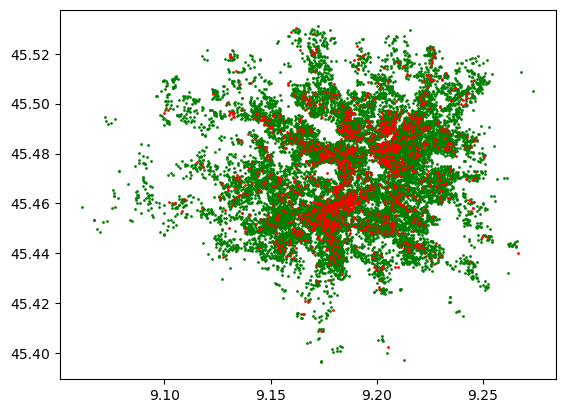

In [10]:
# visualizzazione appartamenti di successo e di insuccesso sulla mappa di Milano
# VERDI: insuccesso, ROSSI: successo

plt.scatter(geo_not_success['longitude'],geo_not_success['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')

In [24]:
# preparazione dataframe fermate metropolitana Milano:
# rinominazione colonne, ordinamento indici e eliminazione righe con longitudine 
# maggiore di 9.27° EST in quanto al di fuori della zona principale di Milano

df_metro.rename(columns={'DO_Y':'latitude', 'DO_X':'longitude'}, inplace=True)  
geo_metro = df_metro.drop(['ID', 'N_ARCHI'], axis=1)
geo_metro = geo_metro[geo_metro['longitude'] < 9.27]
geo_metro.reset_index(inplace=True)

In [35]:
geo_metro

,index,FERMATA,latitude,longitude
0,1,ZARA,45.492662,9.192703
1,2,S.DONATO,45.430214,9.256324
2,3,MACIACHINI,45.497771,9.184904
3,4,MOLINO DORINO,45.505079,9.093327
4,5,BISCEGLIE,45.455368,9.112897
...,...,...,...,...
75,88,COMASINA,45.531556,9.161898
76,89,AFFORI NORD,45.522379,9.167983
77,90,AFFORI CENTRO,45.512880,9.174410
78,91,DERGANO,45.505225,9.179710


In [33]:
# costruzione dataframe con coordinate di alcuni luoghi chiave di Milano:
# Duomo, Porta Romana, Sempione, San Siro e stazione centrale

data = {'luogo': ['Duomo', 'Porta Romana', 'Sempione', 'San Siro', 'stazione centrale'],
    'latitude': [45.464211, 45.45226, 45.47569, 45.47695, 45.485658],
    'longitude': [9.191383, 9.202053, 9.172361, 9.12469, 9.203988]}

geo_key = pd.DataFrame(data)

In [34]:
geo_key

,luogo,latitude,longitude
0,Duomo,45.464211,9.191383
1,Porta Romana,45.452260,9.202053
2,Sempione,45.475690,9.172361
3,San Siro,45.476950,9.124690
4,stazione centrale,45.485658,9.203988


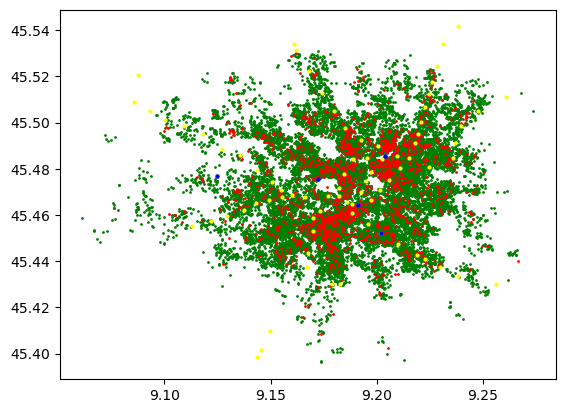

In [68]:
# visualizzazione appartamenti di successo e di insuccesso sulla mappa di Milano
# insieme alle fermate della metropolitana e i luoghi chiave 
# VERDI: insuccesso, ROSSI: successo, GIALLI: fermate metro, BLU: luoghi chiave

plt.scatter(geo_not_success['longitude'],geo_not_success['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')
plt.scatter(geo_metro['longitude'],geo_metro['latitude'], s = 4, c = 'yellow')
plt.scatter(geo_key['longitude'],geo_key['latitude'], s = 5, c = 'blue')

In [44]:
# tutto il blocco da mettere su utils.py insieme alle altre funzioni e togliere da qui

#insieme di funzioni per trovare distanza date 2 coordinate terrestri
#si basa sulla formula di Haversine, a differenza della distanza euclidea,
#tiene conto della curvatura terrestre attraverso la trigonometria

#restiuisce, date due coordinate, la distanza in metri approssimata a due decimali 

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def distanza(latitude1, longitude1, latitude2, longitude2):
    theta = longitude1 - longitude2
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        ))
    return round(distance * 1609.344, 2) 

In [48]:
#tempo di esecuzione circa 45 secondi

#calcolo della distanza minima dalla fermata più vicina per ogni appartamento di successo,
#attraverso un doppio ciclo for, con la condizione if per decretare a ogni ciclo interno
#la nuova distanza se trovata.

#restituisce una lista con la distanza minima per ogni appartamento

min_dis_metro_success = []

for i in range (len(geo_success)):
    min_dis = float('inf')
    for h in range (len(geo_metro)):
        dis = distanza(geo_success.loc[i]['latitude'], geo_success.loc[i]['longitude'],
         geo_metro.loc[h]['latitude'], geo_metro.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_metro_success.append(min_dis)

In [89]:
#tempo di esecuzione circa 3 secondi

#calcolo della distanza minima dal luogo chiave più vicino per ogni appartamento di successo

min_dis_key_success = []

for i in range (len(geo_success)):
    min_dis = float('inf')
    for h in range (geo_key):
        dis = distanza(geo_success.loc[i]['latitude'], geo_success.loc[i]['longitude'],
         geo_key.loc[h]['latitude'], geo_key.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_key_success.append(min_dis)

In [57]:
#tempo di esecuzione circa 10 minuti

#calcolo della distanza minima dalla fermata più vicina per ogni appartamento di non successo

min_dis_metro_not_success = []

for i in range (len(geo_not_success)):
    min_dis = float('inf')
    for h in range (len(geo_metro)):
        dis = distanza(geo_not_success.loc[i]['latitude'], geo_not_success.loc[i]['longitude'],
         geo_metro.loc[h]['latitude'], geo_metro.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_metro_not_success.append(min_dis)

In [64]:
#tempo di esecuzione circa 45 secondi

#calcolo della distanza minima dal luogo chiave più vicino per ogni appartamento di successo

min_dis_key_not_success = []

for i in range (len(geo_not_success)):
    min_dis = float('inf')
    for h in range (len(geo_key)):
        dis = distanza(geo_not_success.loc[i]['latitude'], geo_not_success.loc[i]['longitude'],
         geo_key.loc[h]['latitude'], geo_key.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_key_not_success.append(min_dis)

In [84]:
print('Distanza media metro/appartamenti insuccesso in metri: ' + str(round(np.mean(min_dis_metro_not_success))))
print('Distanza media metro/appartamenti successo in metri: ' + str(round(np.mean(min_dis_metro_success))))
print('Distanza media luoghi chiave/appartamenti insuccesso in metri: ' + str(round(np.mean(min_dis_key_not_success))))
print('Distanza media luoghi chiave/appartamenti successo in metri: ' + str(round(np.mean(min_dis_key_success))))

Distanza media metro/appartamenti insuccesso in metri: 678.0
Distanza media metro/appartamenti successo in metri: 575.0
Distanza media luoghi chiave/appartamenti insuccesso in metri: 1777.0
Distanza media luoghi chiave/appartamenti successo in metri: 1522.0


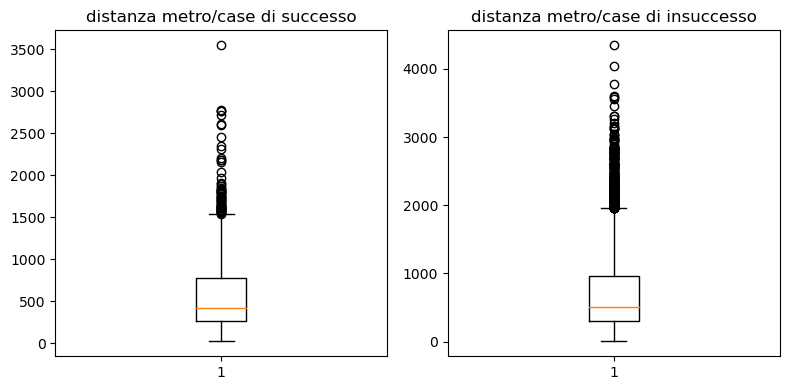

In [86]:
fig, (axs, axu) = plt.subplots(figsize=(8,4), ncols=2)
axs.boxplot(min_dis_metro_success)
axs.set_title("distanza metro/case di successo")
axu.boxplot(min_dis_metro_not_success)
axu.set_title("distanza metro/case di insuccesso")
plt.tight_layout()
plt.show()

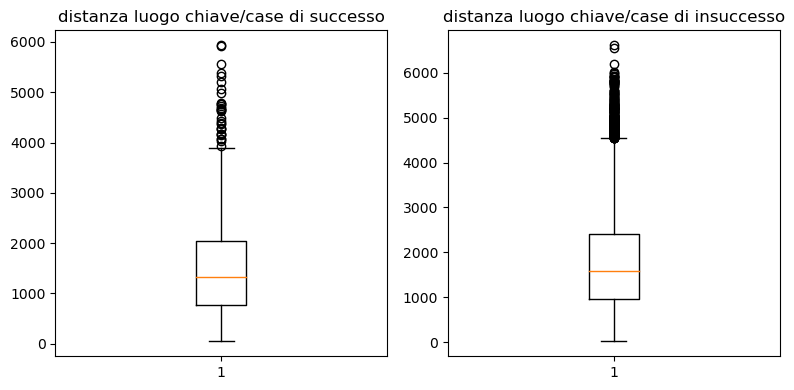

In [87]:
fig, (axsk, axuk) = plt.subplots(figsize=(8,4), ncols=2)
axsk.boxplot(min_dis_key_success)
axsk.set_title("distanza luogo chiave/case di successo")
axuk.boxplot(min_dis_key_not_success)
axuk.set_title("distanza luogo chiave/case di insuccesso")
plt.tight_layout()
plt.show()